# Sentiment Analysis using Python

One of the applications of text mining is sentiment analysis. Most of the data is getting generated in textual format and in the past few years. Improvement is a continuous process and many product based companies leverage these text mining techniques to examine the sentiments of the customers to find about what they can improve in the product. This information also helps them to understand the trend and demand of the end user which results in Customer satisfaction.

As text mining is a vast concept, the article is divided into two subchapters. The main focus of this article will be calculating two scores: sentiment polarity and subjectivity using python. The range of polarity is from -1 to 1(negative to positive) and will tell us if the text contains positive or negative feedback. Most companies prefer to stop their analysis here but in our second article, we will try to extend our analysis by creating some labels out of these scores.

## Import Libraries

In [1]:
import pandas as pd
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud
from textblob import TextBlob

## Import the Data and convert the sample data to a csv file

In [2]:
# Import the data
df=pd.read_json('Sample Data.txt', lines=True) 

#convert the sample data to a csv file
df.to_csv('Sample Data.csv',index=None)

In [3]:
df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/theworkingboat/status/1460...,2021-11-16 09:54:20+00:00,⭐ THANK YOU ⭐\n\nOur popular #Sunday night pub...,⭐ THANK YOU ⭐\n\nOur popular #Sunday night pub...,1460546769096425476,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[Sunday, TheWorkingBoat, Falmouth]",None
1,snscrape.modules.twitter.Tweet,https://twitter.com/WeHoLove/status/1460523193...,2021-11-16 08:20:39+00:00,Ahhh big stars in #gayweho #redressparty #mick...,Ahhh big stars in #gayweho #redressparty #mick...,1460523193395933188,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,3,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,None,None,None,"[gayweho, redressparty, mickysweho, Sunday, th...",None
2,snscrape.modules.twitter.Tweet,https://twitter.com/bdsrated/status/1460518587...,2021-11-16 08:02:21+00:00,Without God\nour week would be\nSINDAY\nMOURND...,Without God\nour week would be\nSINDAY\nMOURND...,1460518587639025673,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[CHURCH, SUNDAY, BDMS, SOMEWHEREINCAVITE, BILL]",None
3,snscrape.modules.twitter.Tweet,https://twitter.com/maggietranquila/status/146...,2021-11-16 07:34:44+00:00,#awesome #Attitude #Motivation #commitment #Su...,#awesome #Attitude #Motivation #commitment #Su...,1460511638856114185,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,None,None,None,None,"[awesome, Attitude, Motivation, commitment, Su...",None
4,snscrape.modules.twitter.Tweet,https://twitter.com/BadalonaCC/status/14605071...,2021-11-16 07:16:46+00:00,@BadalonaCC #Sunday training with @omaree02\n\...,@BadalonaCC #Sunday training with @omaree02\n\...,1460507115982925826,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,4,...,"[{'_type': 'snscrape.modules.twitter.Video', '...",NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,[Sunday],None


## Data Preprocessing

Now we will perform various pre-processing steps on the dataset that mainly dealt with removing stopwords, removing emojis. The text document is then converted into the lowercase for better generalization.

Subsequently, the punctuations will be cleaned and removed thereby reducing the unnecessary noise from the dataset. After that, we will also remove the repeating characters from the words along with removing the URLs as they do not have any significant importance.

At last, we will then perform Stemming(reducing the words to their derived stems) and Lemmatization(reducing the derived words to their root form known as lemma) for better results.

## Data Cleaning

In [5]:
df.fillna('', inplace=True)

In [6]:
df.shape

(5642, 28)

In [7]:
import nltk
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


**Making statement text in lower case**

In [8]:
df['content']=df['content'].str.lower()
df['content'].head()

0    ⭐ thank you ⭐\n\nour popular #sunday night pub...
1    ahhh big stars in #gayweho #redressparty #mick...
2    without god\nour week would be\nsinday\nmournd...
3    #awesome #attitude #motivation #commitment #su...
4    @badalonacc #sunday training with @omaree02\n\...
Name: content, dtype: object

### Removing punctuation, numbers and special characters ###
**This will replace everything except characters and hashtags with spaces. "[^a-zA-Z#]" this regular expression means everything except alphabets and hashtags.**

**Cleaning and removing punctuations**

In [9]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['content']= df['content'].apply(lambda x: cleaning_punctuations(x))
df['content'].head()

0    ⭐ thank you ⭐\n\nour popular sunday night pub ...
1    ahhh big stars in gayweho redressparty mickysw...
2    without god\nour week would be\nsinday\nmournd...
3    awesome attitude motivation commitment sunday ...
4    badalonacc sunday training with omaree02\n\ncr...
Name: content, dtype: object

**Cleaning and removing repeating characters**

In [10]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['content'] = df['content'].apply(lambda x: cleaning_repeating_char(x))
df['content'].head()

0    ⭐ thank you ⭐\n\nour popular sunday night pub ...
1    ahhh big stars in gayweho redressparty mickysw...
2    without god\nour week would be\nsinday\nmournd...
3    awesome attitude motivation commitment sunday ...
4    badalonacc sunday training with omaree02\n\ncr...
Name: content, dtype: object

**Cleaning and removing URL’s**

In [11]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['content'] = df['content'].apply(lambda x: cleaning_URLs(x))
df['content'].head()

0    ⭐ thank you ⭐\n\nour popular sunday night pub ...
1    ahhh big stars in gayweho redressparty mickysw...
2    without god\nour week would be\nsinday\nmournd...
3    awesome attitude motivation commitment sunday ...
4    badalonacc sunday training with omaree02\n\ncr...
Name: content, dtype: object

**Cleaning and removing Numeric numbers**

In [12]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', ' ', data)
df['content'] = df['content'].apply(lambda x: cleaning_numbers(x))
df['content'].head()

0    ⭐ thank you ⭐\n\nour popular sunday night pub ...
1    ahhh big stars in gayweho redressparty mickysw...
2    without god\nour week would be\nsinday\nmournd...
3    awesome attitude motivation commitment sunday ...
4    badalonacc sunday training with omaree \n\ncri...
Name: content, dtype: object

### Remove short words ###

**We remove those words which are of little or no use. So, we will select the length of words which we want to remove**

In [13]:
def transform_text(text):
    return ' '.join([word for word in text.split() if len(word) > 2])
df['content'] = df['content'].apply(lambda x: transform_text(x))
df['content'].head()

0    thank you our popular sunday night pub quizzes...
1    ahhh big stars gayweho redressparty mickysweho...
2    without god our week would sinday mournday tea...
3    awesome attitude motivation commitment sunday ...
4    badalonacc sunday training with omaree cricket...
Name: content, dtype: object

# Tokenization #

Tokenization is a way to split the strings into a list of words. In this example you’ll use the Natural Language Toolkit which has built-in functions for tokenization. we can also use regex to tokenize it but it is a bit difficult. Though it gives you more control over our text

**Getting tokenization of tweet text**

In [14]:
# Function which directly tokenize the tweet data
from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer()
df['content']=df['content'].apply(tt.tokenize)
df['content'].head()

0    [thank, you, our, popular, sunday, night, pub,...
1    [ahhh, big, stars, gayweho, redressparty, mick...
2    [without, god, our, week, would, sinday, mourn...
3    [awesome, attitude, motivation, commitment, su...
4    [badalonacc, sunday, training, with, omaree, c...
Name: content, dtype: object

**Applying Stemming**

In [15]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['content']= df['content'].apply(lambda x: stemming_on_text(x))
df['content'].head()

0    [thank, you, our, popular, sunday, night, pub,...
1    [ahhh, big, stars, gayweho, redressparty, mick...
2    [without, god, our, week, would, sinday, mourn...
3    [awesome, attitude, motivation, commitment, su...
4    [badalonacc, sunday, training, with, omaree, c...
Name: content, dtype: object

**Applying Lemmatizer**

In [16]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...


True

In [17]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['content'] = df['content'].apply(lambda x: lemmatizer_on_text(x))
df['content'].head()

0    [thank, you, our, popular, sunday, night, pub,...
1    [ahhh, big, stars, gayweho, redressparty, mick...
2    [without, god, our, week, would, sinday, mourn...
3    [awesome, attitude, motivation, commitment, su...
4    [badalonacc, sunday, training, with, omaree, c...
Name: content, dtype: object

# Subjectivity and polarity #

In [18]:
#create a function to get the subjectivity
def getSubjectivity(text):
    # Join the list of words into a single string using a space separator
    text = ' '.join(text)
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getpolarity(text):
    # Join the list of words into a single string using a space separator
    text = ' '.join(text)
    return TextBlob(text).sentiment.polarity

#create two new columns
df['subjectivity']=df['content'].apply(getSubjectivity)
df['polarity']=df['content'].apply(getpolarity)

#show the new datafraem with the new columns
df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,subjectivity,polarity
0,snscrape.modules.twitter.Tweet,https://twitter.com/theworkingboat/status/1460...,2021-11-16 09:54:20+00:00,"[thank, you, our, popular, sunday, night, pub,...",⭐ THANK YOU ⭐\n\nOur popular #Sunday night pub...,1460546769096425476,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,,,,"[{'_type': 'snscrape.modules.twitter.User', 'u...",,,"[Sunday, TheWorkingBoat, Falmouth]",,0.464286,0.385714
1,snscrape.modules.twitter.Tweet,https://twitter.com/WeHoLove/status/1460523193...,2021-11-16 08:20:39+00:00,"[ahhh, big, stars, gayweho, redressparty, mick...",Ahhh big stars in #gayweho #redressparty #mick...,1460523193395933188,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,3,...,,,,,,,"[gayweho, redressparty, mickysweho, Sunday, th...",,0.100000,0.000000
2,snscrape.modules.twitter.Tweet,https://twitter.com/bdsrated/status/1460518587...,2021-11-16 08:02:21+00:00,"[without, god, our, week, would, sinday, mourn...",Without God\nour week would be\nSINDAY\nMOURND...,1460518587639025673,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,,,,"[{'_type': 'snscrape.modules.twitter.User', 'u...",,,"[CHURCH, SUNDAY, BDMS, SOMEWHEREINCAVITE, BILL]",,0.625000,-0.375000
3,snscrape.modules.twitter.Tweet,https://twitter.com/maggietranquila/status/146...,2021-11-16 07:34:44+00:00,"[awesome, attitude, motivation, commitment, su...",#awesome #Attitude #Motivation #commitment #Su...,1460511638856114185,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,,,,,,,"[awesome, Attitude, Motivation, commitment, Su...",,1.000000,1.000000
4,snscrape.modules.twitter.Tweet,https://twitter.com/BadalonaCC/status/14605071...,2021-11-16 07:16:46+00:00,"[badalonacc, sunday, training, with, omaree, c...",@BadalonaCC #Sunday training with @omaree02\n\...,1460507115982925826,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,4,...,,,,"[{'_type': 'snscrape.modules.twitter.User', 'u...",,,[Sunday],,0.000000,0.000000


## Compute the negative, neutral and positive analysis ##

In [19]:
#create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'
    
df['analysis']=df['polarity'].apply(getAnalysis)

#show dataFrame
df.head()


,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,subjectivity,polarity,analysis
0,snscrape.modules.twitter.Tweet,https://twitter.com/theworkingboat/status/1460...,2021-11-16 09:54:20+00:00,"[thank, you, our, popular, sunday, night, pub,...",⭐ THANK YOU ⭐\n\nOur popular #Sunday night pub...,1460546769096425476,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,,,"[{'_type': 'snscrape.modules.twitter.User', 'u...",,,"[Sunday, TheWorkingBoat, Falmouth]",,0.464286,0.385714,positive
1,snscrape.modules.twitter.Tweet,https://twitter.com/WeHoLove/status/1460523193...,2021-11-16 08:20:39+00:00,"[ahhh, big, stars, gayweho, redressparty, mick...",Ahhh big stars in #gayweho #redressparty #mick...,1460523193395933188,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,3,...,,,,,,"[gayweho, redressparty, mickysweho, Sunday, th...",,0.100000,0.000000,neutral
2,snscrape.modules.twitter.Tweet,https://twitter.com/bdsrated/status/1460518587...,2021-11-16 08:02:21+00:00,"[without, god, our, week, would, sinday, mourn...",Without God\nour week would be\nSINDAY\nMOURND...,1460518587639025673,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,,,"[{'_type': 'snscrape.modules.twitter.User', 'u...",,,"[CHURCH, SUNDAY, BDMS, SOMEWHEREINCAVITE, BILL]",,0.625000,-0.375000,negative
3,snscrape.modules.twitter.Tweet,https://twitter.com/maggietranquila/status/146...,2021-11-16 07:34:44+00:00,"[awesome, attitude, motivation, commitment, su...",#awesome #Attitude #Motivation #commitment #Su...,1460511638856114185,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,,,,,,"[awesome, Attitude, Motivation, commitment, Su...",,1.000000,1.000000,positive
4,snscrape.modules.twitter.Tweet,https://twitter.com/BadalonaCC/status/14605071...,2021-11-16 07:16:46+00:00,"[badalonacc, sunday, training, with, omaree, c...",@BadalonaCC #Sunday training with @omaree02\n\...,1460507115982925826,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,4,...,,,"[{'_type': 'snscrape.modules.twitter.User', 'u...",,,[Sunday],,0.000000,0.000000,neutral


In [20]:
# create two new dataframe all of the positive text
df_positive = df[df['analysis'] == 'positive']


# create two new dataframe all of the negative text
df_negative = df[df['analysis'] == 'negative']


# create two new dataframe all of the neutral text
df_neutral=df[df['analysis'] == 'neutral']

**Count the number of positive, negative, neutral reviews.**

In [21]:
tb_counts = df.analysis.value_counts()
tb_counts

analysis
neutral     2621
positive    2596
negative     425
Name: count, dtype: int64

# Data Exploration #

## Let's form a WordCloud ##

### A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes ###

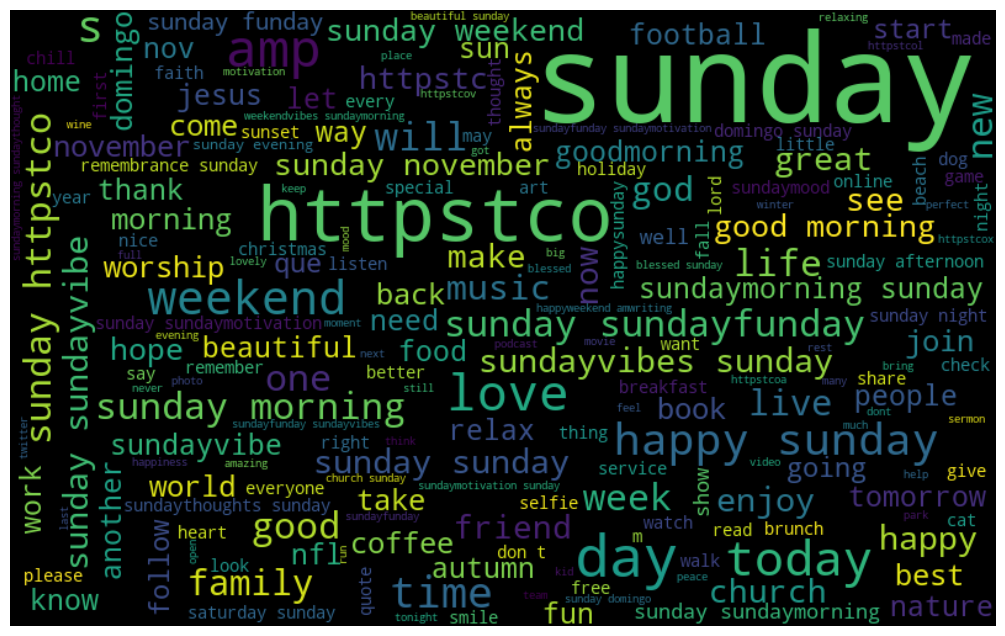

In [22]:
# Visualizing all tweets

all_words = " ".join(" ".join(sent) for sent in df['content'])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Positive tweets ###

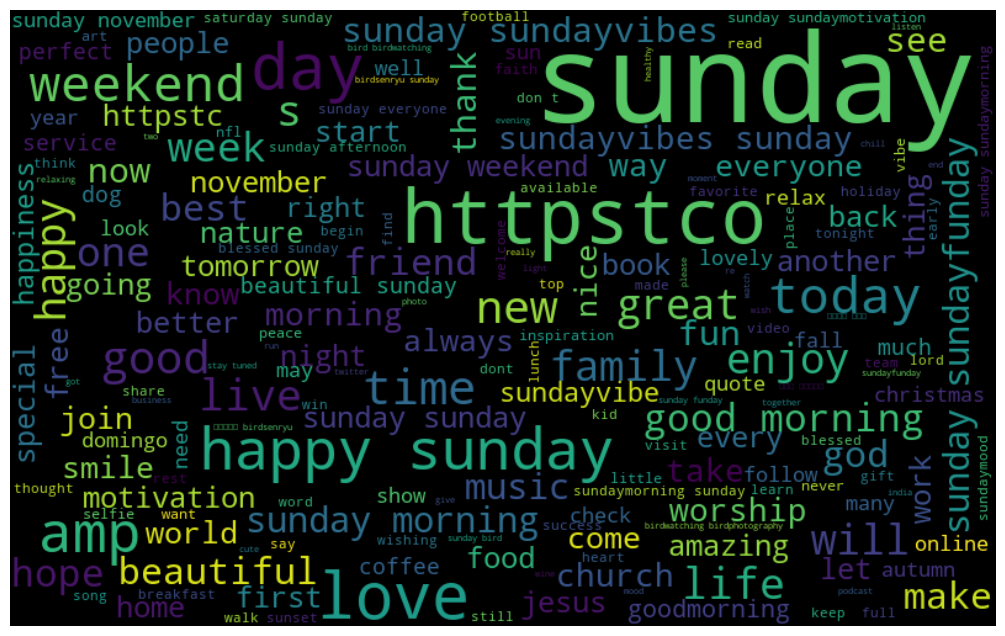

In [23]:
# Visualizing all positive tweets
               
all_pos_words = " ".join(" ".join(sent) for sent in df_positive['content'])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_pos_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Negative tweets ###

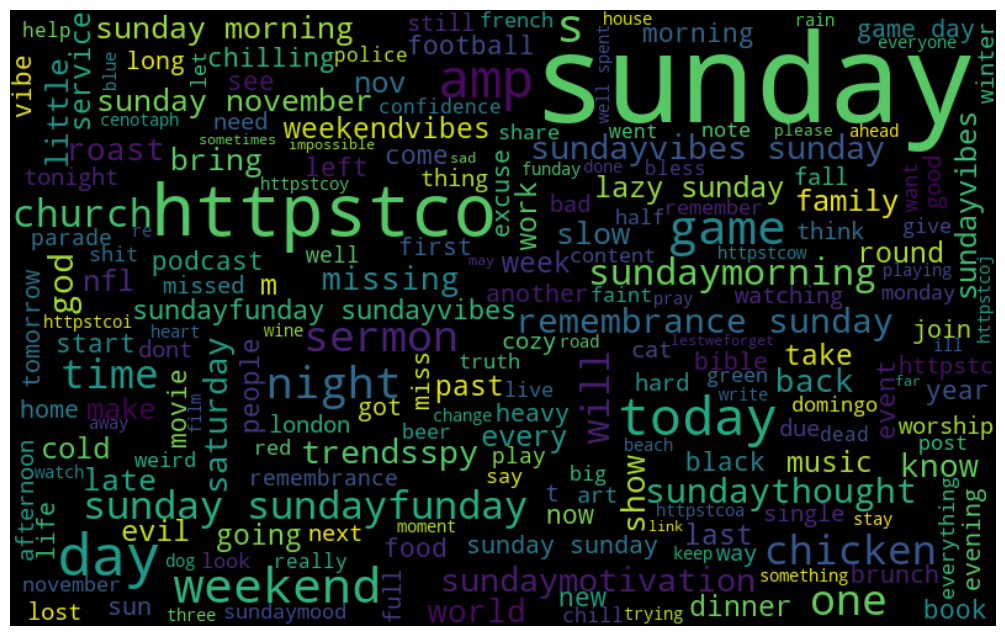

In [24]:
# Visualizing all negative tweets

all_neg_words = " ".join(" ".join(sent) for sent in df_negative['content'])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_neg_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Neutral tweets ###

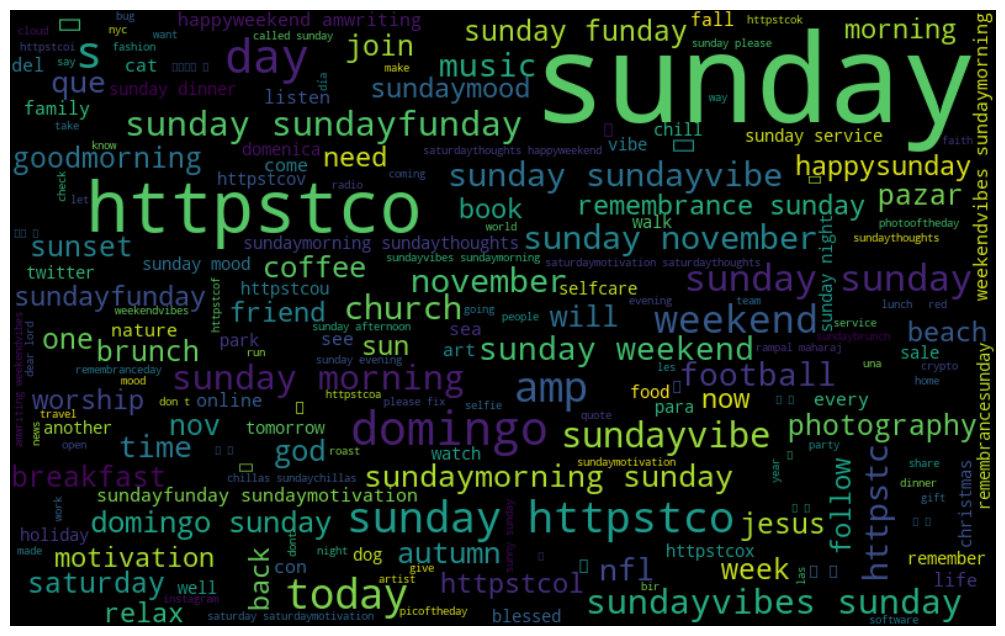

In [25]:
# Visualizing all neutral tweets

all_neu_words = " ".join(" ".join(sent) for sent in df_neutral['content'])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_neu_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

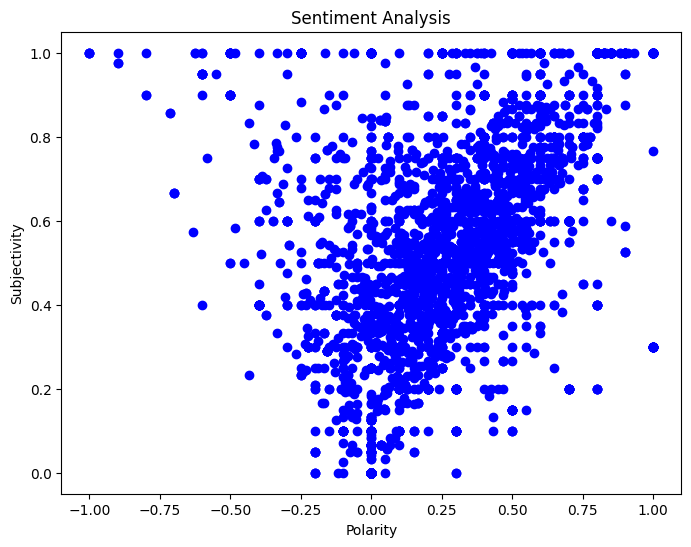

In [26]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
plt.scatter(df['polarity'], df['subjectivity'], color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [27]:
# Get the percentage of positive tweets
print("Positive tweets",round((df_positive.shape[0]/df.shape[0])*100,1),"%")
# Get the percentage of negative tweets
print("Negative tweets",round((df_negative.shape[0]/df.shape[0])*100,1),"%")
# Get the percentage of neutral tweets
print("Neutral tweets",round((df_neutral.shape[0]/df.shape[0])*100,1),"%")

Positive tweets 46.0 %
Negative tweets 7.5 %
Neutral tweets 46.5 %


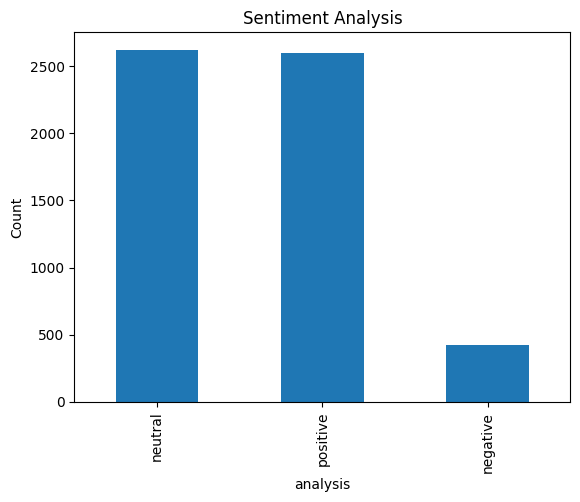

In [28]:
# show the value counts

df['analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['analysis'].value_counts().plot(kind='bar')
plt.show()


# Conclusion #

we can see that maximum percentage of neutral tweets 47.8% , minimum percentage of negative tweets 7.5% and Avg percentage of positive tweets 44.7%.